In [1]:
import numpy as np
from scipy import signal
from scipy import linalg
from scipy.io import wavfile
import scipy.io
import matplotlib as mpl
import matplotlib.pyplot as plt

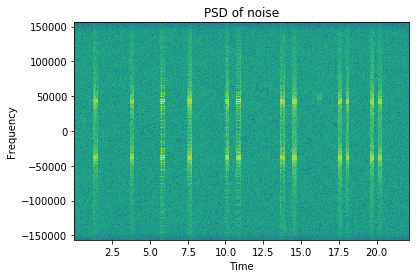

In [2]:
r, d = wavfile.read("TQ8-RKE-4F16 Hyundai Sonata 2017.wav")
dr = d[:,0]
di = d[:,1]
dc = dr + 1j*di

def ret_sig_from_sec(sig, rate, start, stop):
    return sig[int(start*rate):int(stop*rate)]

dcn = ret_sig_from_sec(dc, r, 0.5, 0.6)
dcs = ret_sig_from_sec(dc, r, 1.4, 1.5)

plt.specgram(dc, NFFT=1024, Fs=r)
plt.title("PSD of noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

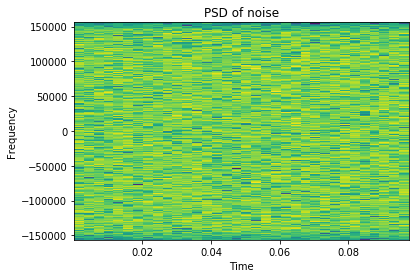

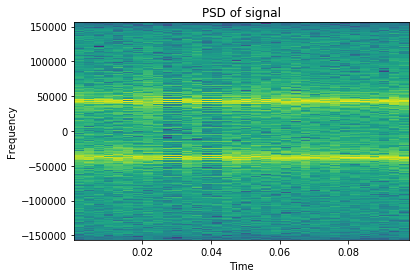

In [3]:
plt.specgram(dcn, NFFT=1024, Fs=r)
plt.title("PSD of noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.specgram(dcs, NFFT=1024, Fs=r)
plt.title("PSD of signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [4]:
len(dcn)
len(dcs)

f_noise = dcn
f = dcs

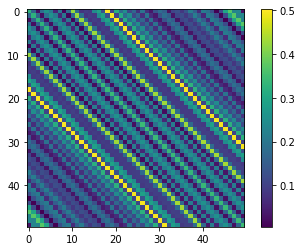

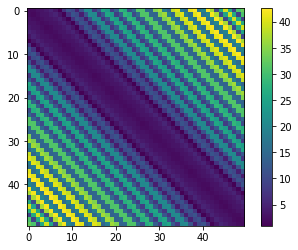

Noise only: 25.424723065895645
Noise and signal: 343.0969145337309
Diff: 317.67219146783526


In [5]:
def processing_vec(y, t, l):
    return y[t:(t+l)]

def mult(y, t, l):
#     return np.dot(processing_vec(y, t, l), processing_vec(y, t, l).T)
    return np.outer(processing_vec(y, t, l), processing_vec(y, t, l)) 

def cal(y, l):
    y = y.reshape((-1, 1))
    r = np.zeros((l, l), dtype=complex)
    for i in range(0, len(y)-l):
        r += mult(y, i, l)
    return r / (len(y)-l)

l = 50
c_noise = np.abs(cal(f_noise, l))
c = np.abs(cal(f, l))

plt.imshow(c_noise)
plt.colorbar()
plt.show()

plt.imshow(c)
plt.colorbar()
plt.show()

def test1(x):
    t1 = x.sum()
    t2 = x.trace()
    return t1/t2

def test2(x):
    eig = linalg.eigvals(x)
    eig_max = np.max(eig)
    eig_min = np.min(eig)
    return eig_max/eig_min
    
print(f"Noise only: {test1(c_noise)}")
print(f"Noise and signal: {test1(c)}")
print(f"Diff: {test1(c)-test1(c_noise)}")